In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


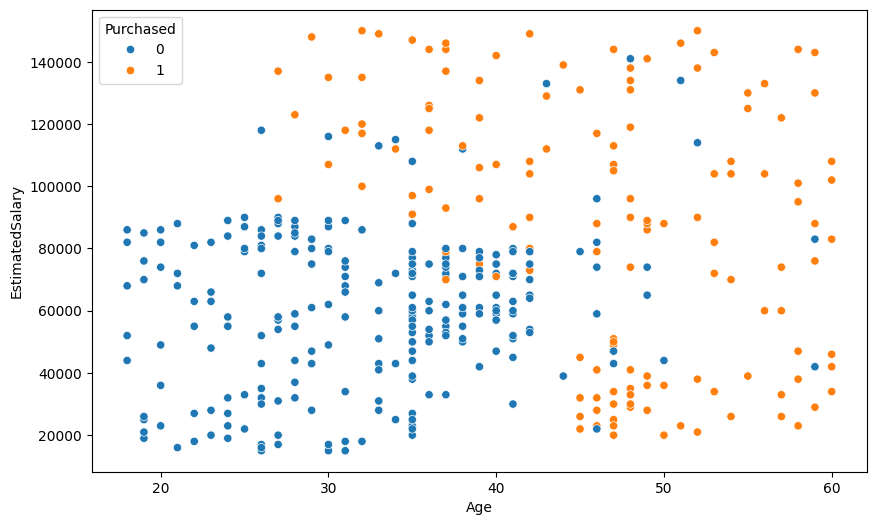

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])
plt.show()

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [8]:
x=df[['Age','EstimatedSalary']]

In [9]:
sse=[]
for i in range(1,16):
    km=KMeans(n_clusters=i,n_init=100)
    km.fit_predict(x)
    sse.append(km.inertia_)
sse

[463878521346.3898,
 165190336606.73495,
 59489963536.99382,
 33459749146.525555,
 19983401049.300735,
 14669764770.344114,
 10082044058.999088,
 8054486562.903379,
 6340386985.394448,
 5202516060.252058,
 4188424186.896205,
 3200310138.3843126,
 2794264380.965121,
 2381610687.3661942,
 2095970791.6326208]

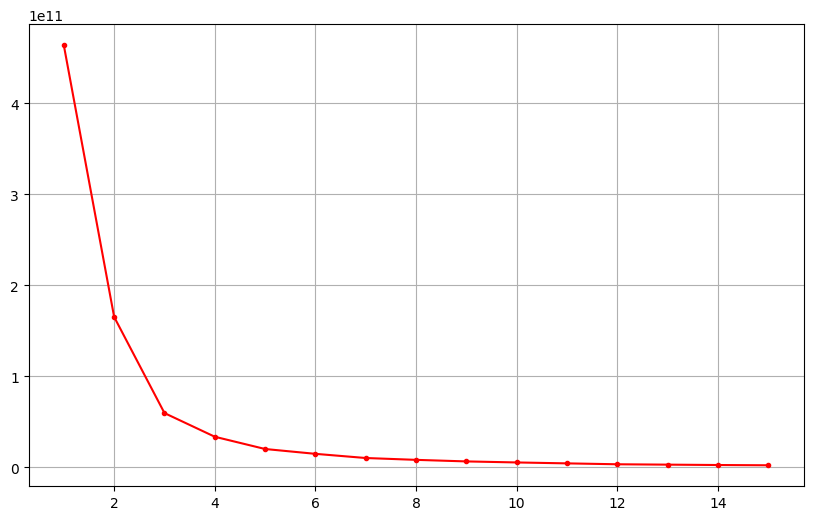

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),sse,marker='.',color='r')
plt.grid()
plt.show()

In [12]:
silh=[]
for i in range(2,16):
    km=KMeans(n_clusters=i,n_init=100)
    labels=km.fit_predict(x)
    silh.append(silhouette_score(x,labels))
silh

[0.5388564296343122,
 0.6021707228326366,
 0.6065989841357814,
 0.6102051324759187,
 0.560924572213266,
 0.5768107257486763,
 0.5747167816282324,
 0.5734413708811856,
 0.571353934783502,
 0.5723612598659871,
 0.5901960297408847,
 0.5852309077220788,
 0.5883430983655401,
 0.575651160643711]

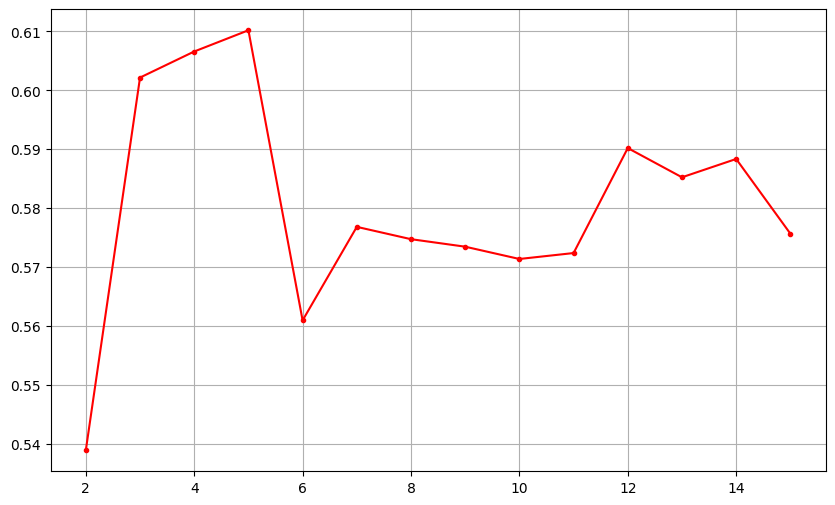

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(2,16),silh,marker='.',color='r')
plt.grid()
plt.show()

In [22]:
km=KMeans(n_clusters=3,n_init=100)
labels=km.fit_predict(x)
labels

array([2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2,

In [23]:
cen=km.cluster_centers_

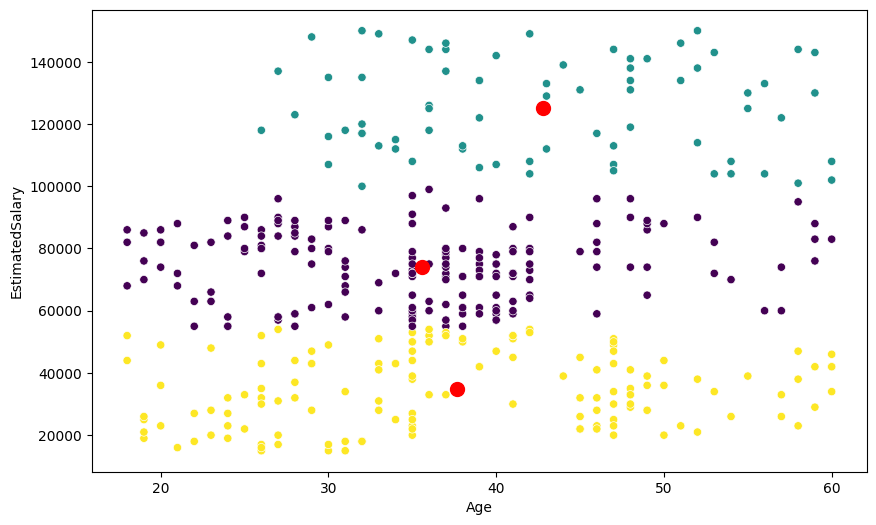

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],c=labels)
plt.scatter(cen[:,0],cen[:,1],c='r',s=100)
plt.show()

In [25]:
df[labels == 0]

,User ID,Gender,Age,EstimatedSalary,Purchased
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
9,15727311,Female,35,65000,0
...,...,...,...,...,...
378,15577806,Male,41,87000,1
380,15683758,Male,42,64000,0
385,15775335,Male,56,60000,1
387,15627220,Male,39,71000,0


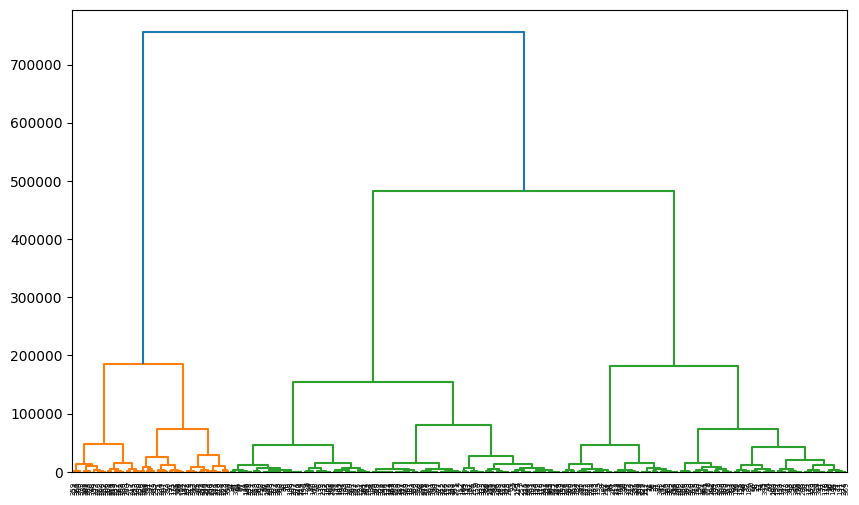

In [21]:
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [27]:
ag=AgglomerativeClustering(n_clusters=3)
labels1=ag.fit_predict(x)
labels1

array([1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1,

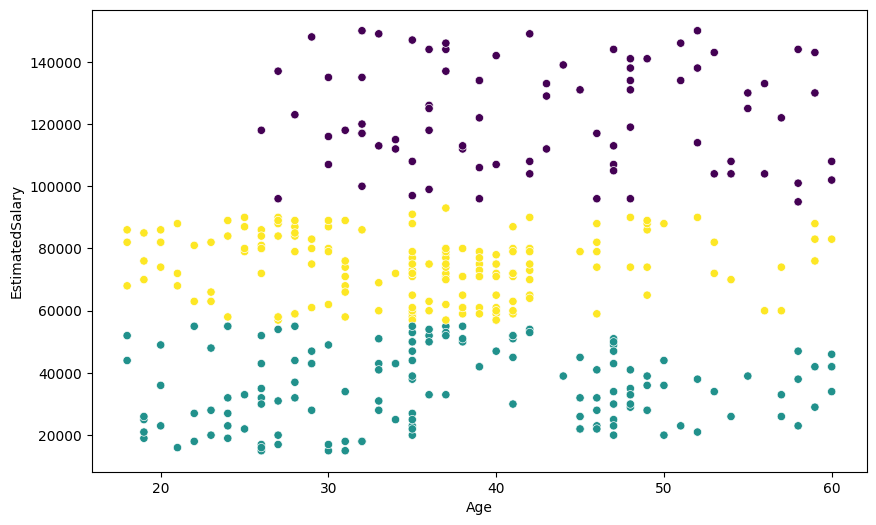

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],c=labels1)
#plt.scatter(cen[:,0],cen[:,1],c='r',s=100)
plt.show()

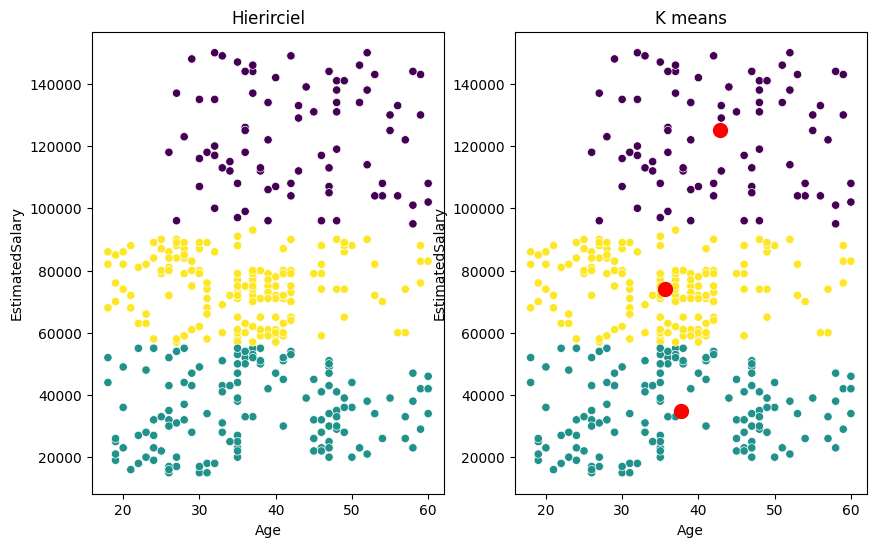

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],c=labels1)
plt.title('Hierirciel')
#plt.scatter(cen[:,0],cen[:,1],c='r',s=100)
plt.subplot(1,2,2)
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],c=labels)
plt.title('K means')
plt.scatter(cen[:,0],cen[:,1],c='r',s=100)
plt.show()